In [9]:
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib

  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------------- ------------ 1.6/2.3 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 9.3 MB/s  0:00:00
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl (7.0 MB)
Using cached pyparsing-3.2.5-py3-none-any.w

Dataset loaded. Shape: (100000, 20)
Numeric columns: ['Quantity', 'UnitPrice', 'Discount', 'ShippingCost', 'TotalAmount']
Categorical columns: ['OrderDate', 'Category', 'Brand', 'PaymentMethod', 'OrderStatus', 'City', 'State', 'Country']
Training started...
Training completed!
R² Score on Test Set: 0.9700

Top 10 Features by Importance:
                        Feature  Importance
4                   TotalAmount    0.732937
1                     UnitPrice    0.151492
2                      Discount    0.084254
0                      Quantity    0.025547
3                  ShippingCost    0.002907
1848  PaymentMethod_Credit Card    0.000289
1894      Country_United States    0.000278
1888                   State_TX    0.000195
1853      OrderStatus_Delivered    0.000177
1878                   State_CA    0.000148


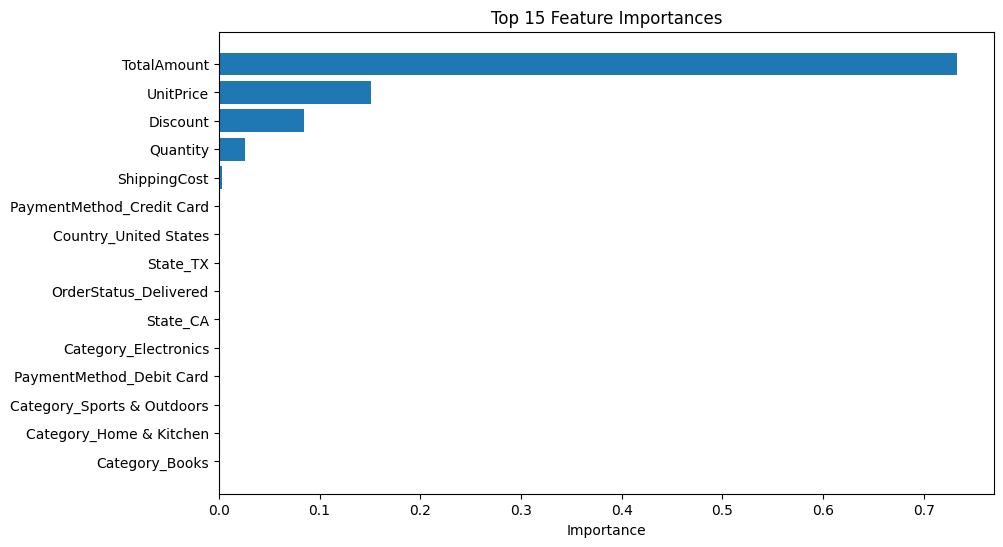


Sample Predictions (First 10 rows):
   Actual Tax  Predicted Tax
0        0.00      16.847407
1       24.72      26.064691
2       91.28      99.706917
3        7.90       9.655402
4      114.22     116.223406
5       40.35      40.720127
6       95.73      76.877751
7      170.19     166.556122
8       19.90      17.854857
9       32.60      33.216055


In [10]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

# -----------------------------
# Amazon Tax Prediction - Portfolio Ready
# -----------------------------

# 1. Load dataset
df = pd.read_csv("Amazon.csv")
print("Dataset loaded. Shape:", df.shape)

# 2. Drop irrelevant columns
df = df.drop(["OrderID","CustomerID","CustomerName",
              "ProductID","ProductName","SellerID"], axis=1)

# 3. Define features and target
X = df.drop(columns=["Tax"])
y = df["Tax"]

# 4. Identify numeric and categorical columns
num_col = X.select_dtypes(include=["int64","float64"]).columns
cat_col = X.select_dtypes(include=["object","category"]).columns
print("Numeric columns:", list(num_col))
print("Categorical columns:", list(cat_col))

# 5. Preprocessing pipelines
num_transform = Pipeline(steps=[("scaler", StandardScaler())])
cat_transform = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))])

preprocess = ColumnTransformer(transformers=[
    ("num", num_transform, num_col),
    ("cat", cat_transform, cat_col)
])

# 6. Complete pipeline with RandomForestRegressor
model = Pipeline(steps=[
    ("preprocessing", preprocess),
    ("RandomForest", RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=5,
        n_jobs=-1,
        random_state=42
    ))
])

# 7. Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. Train the model
print("Training started...")
model.fit(X_train, y_train)
print("Training completed!")

# 9. Predict and evaluate
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)
print(f"R² Score on Test Set: {score:.4f}")
